# **SME0142 - Álgebra Linear e Aplicações**
Docente: Cynthia de Oliveira Lage Ferreira


# **Trabalho Prático**
Outubro de 2025

# Aluno: Pedro Henrique de Sousa Prestes - 15507819

# Orientações Gerais

*   Esta avaliação é **individual ou em dupla** e deverá ser desenvolvida na plataforma Colab (https://colab.research.google.com/).

*   Cada aluno/dupla deverá produzir um arquivo .ipynb contendo as soluções dos exercícios. Sejam organizados !

*   Os arquivos deverão estar identificados por **NOMEDOALUNO1NoUSP-NOMEDOALUNO2NoUSP.ipynb** a fim de facilitar a organização das atividades pela professora.

*  Os arquivos deverão ser enviados **até às 20h do dia 18/10/2025** através da plataforma e-disciplinas da USP (https://edisciplinas.usp.br/). **Os arquivos recebidos por e-mail não serão corrigidos.** Arquivos enviados fora do prazo também não serão corrigidos!

*   Apenas os alunos que estiverem com a **situação regularizada no Sistema Jupiter** terão suas avaliações corrigidas.

*  Todos os códigos utilizados para resolver os problemas deverão ser apresentados, executados e minimamente comentados. **Questões com respostas sem justificativas não serão consideradas.**

**BOM TRABALHO!**

In [195]:
# Bibliotecas Utilizadas
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD

# Configs
pd.options.display.float_format = '{:.6f}'.format

# **Exercício 1**
Considere o espaço vetorial real $\mathbb{R}^2$. Sejam as transformações
- $T_1:\mathbb{R}^2 \to \mathbb{R}^2$ tal que $T_1(x,y)=(-x,y)$ - **reflexão em torno do eixo $oy$**;
- $T_2:\mathbb{R}^2 \to \mathbb{R}^2$ tal que a matriz da transformação é dada por
$$[T_2] = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix},$$
com $k\in\mathbb{R}$ - **cisalhamento horizontal**.

a) Aplique as transformações $T_1$ e $T_2$ no quadrado de vértices $(0,0)$, $(1,0)$, $(1,1)$ e $(0,1)$ considerando o parâmetro $k= -0,5$ e visualize os resultados.

b) Determine a matriz da transformação $T_3$ que primeiro faz um cisalhamento horizontal com $k=-0.5$ mapeando $e_2$ em $e_2 - 0.5e_1$ ($e_1$ se mantém inalterado) e então reflete o resultado em torno do eixo $oy$. **Dica:** Determine a posição final das imagens de $e_1$ e $e_2$.

c) Qual a relação entre as matrizes $[T_1]$, $[T_2]$ e a matriz da transformação $[T_3]$ obtida no item anterior?

d) Determine a transformação de reflexão em torno do eixo $ox$ e a transformação de cisalhamento vertical.

[[-1  0]
 [ 0  1]]
[[ 1.  -0.5]
 [ 0.   1. ]]


Text(0.5, 1.0, 'Cisalhamento')

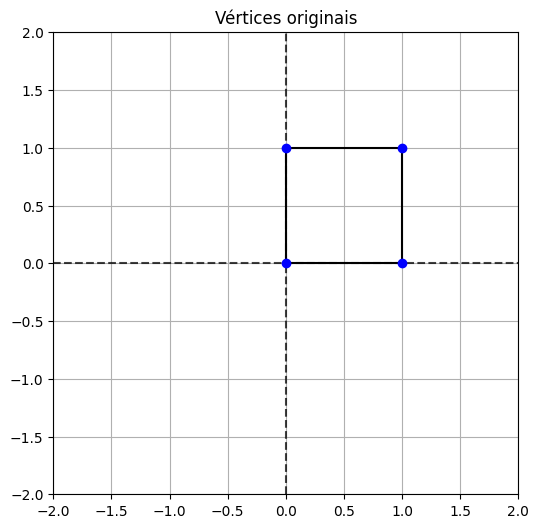

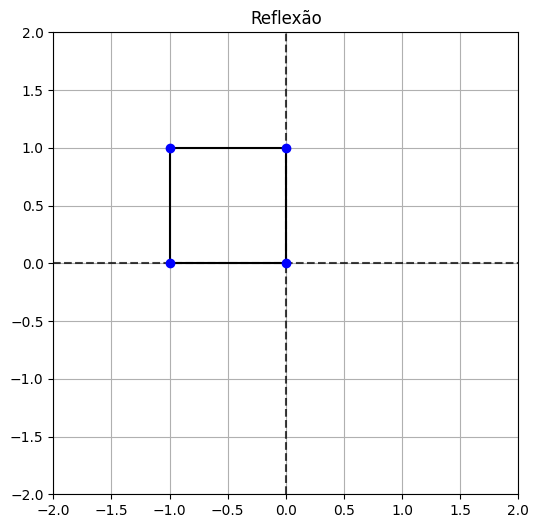

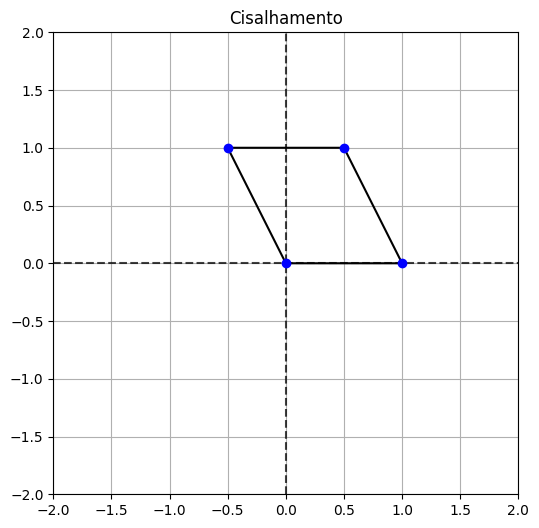

In [196]:
# a)
# Nota: Algumas matrizes são transpostas para padronizar vetores como colunas

# Vértices do quadrado
Q = np.array([[0,0],[1,0],[1,1],[0,1]]).T

# Matriz T1: Reflexão em torno do eixo y
# T(x,y) = (-x,y) = x(-1,0) + y(0,1)
T1 = np.array([[-1,0], [0,1]]).T
print(T1)

# Matriz T2: Cisalhamento horizontal
# T(x,y) = (x + yk, y) = x(1,0) + y(k,1)
k = -0.5
T2 = np.array([[1,k], [0,1]])
print(T2)

# Aplicando as transformações
T1Q = T1 @ Q
T2Q = T2 @ Q

def plotSimples(vx: np.array, vy: np.array) -> None:
  '''
  Recebe dois np.arrays no eixo e x e y para plotar
  '''
  plt.figure(figsize=(6,6))
  plt.axis([-2, 2, -2, 2])
  plt.plot([-2,2], [0,0], 'k--', alpha=0.75)
  plt.plot([0,0], [-2,2],'k--', alpha=0.75)
  plt.plot(vx, vy, 'k')
  plt.plot([vx[0], vx[-1]], [vy[0], vy[-1]], 'k')
  plt.plot(vx, vy, 'bo')
  plt.grid('True')

# Plots
plotSimples(Q[0], Q[1])
plt.title('Vértices originais')

plotSimples(T1Q[0], T1Q[1])
plt.title('Reflexão')

plotSimples(T2Q[0], T2Q[1])
plt.title('Cisalhamento')

[[-1.   0.5]
 [ 0.   1. ]]
[[-1.   0.5]
 [ 0.   1. ]]


Text(0.5, 1.0, 'Cisalhamento vertical')

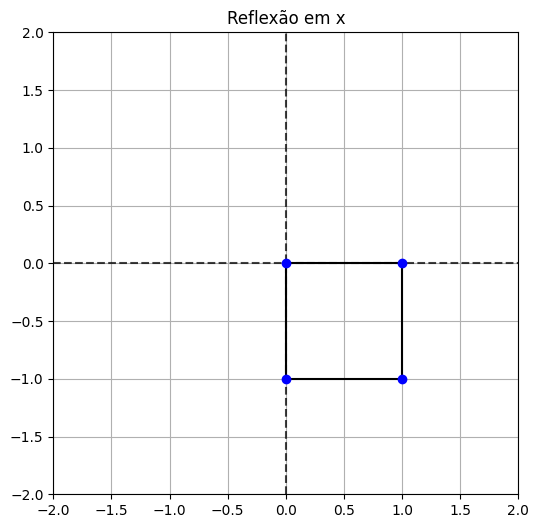

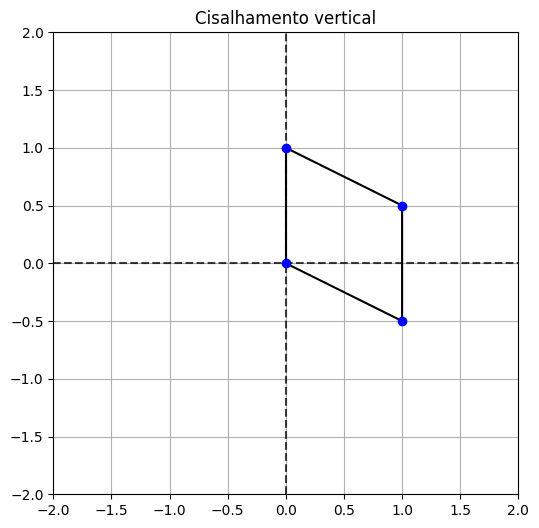

In [197]:
# b)
# Observando as posições finais de e1 e e2 temos:
# T3(1,0) = (-1,0)
# T3(0,1) = (0.5,1)
T3 = np.array([[-1,0], [0.5,1]]).T
print(T3)

# c)
# Por outro lado, aplicando T2, depois T1
print(T1 @ T2) 
# T3 é a composição de T2 e T1
# Aplica-se primeiro o cisalhamento T2 e, em seguida, a reflexão T1

# d)
# Reflexão em torno do eixo x
# T(x,y) = (x,-y) = x(1,0) + y(0,-1)
T4 = np.array([[1,0], [0,-1]]).T

# Cisalhamento vertical
# T(x,y) = (x,xk + y) = x(1,k) + y(0,1)
T5 = np.array([[1,k], [0,1]]).T

# Aplicando as transformações
T4Q = T4 @ Q
T5Q = T5 @ Q

# Plots
plotSimples(T4Q[0], T4Q[1])
plt.title('Reflexão em x')

plotSimples(T5Q[0], T5Q[1])
plt.title('Cisalhamento vertical')

# **Exercício 2**
Considere a transformação $T:R^7 \rightarrow R^3$ linear dada pela matriz

$$
\left(\begin{array}{ccccccc}
3 & 9 & 6 & 6 & 9 & 3 & 1\\
2 & 0 & 9 & 2 & 0 & 5 & 3\\
0 & 0 & 1 & 0 & 1 & 0 & 2
\end{array}\right)
$$

a) Qual a dimensão do núcleo e da imagem da transformação? Faça um código para determinar a dimensão da imagem e conclua, então, a dimensão do núcleo.

b) Encontre uma base para o espaço núcleo.

c) Faça um código para verificar que a base encontrada está gerando o núcleo.

In [198]:
B = np.asarray([[3, 9, 6, 6, 9, 3, 1],
                [2, 0, 9, 2, 0, 5, 3],
                [0, 0, 1 , 0, 1, 0, 2]])

# Dimensão da Imagem = Posto da Matriz de Transformação
dim_img = np.linalg.matrix_rank(B)
print(f'Dimensão da Imagem: {dim_img}')

# Pelo teorema do núcleo e da imagem
dim_R7 = np.linalg.matrix_rank(np.eye(7))
dim_kernel = dim_R7 - dim_img
print(f'Dimensão do Núcleo: {dim_kernel}')

# Os vetores singulares à direita que correspondem a valores singulares nulos de B geram o núcleo (kernel) de B
_, _, V_Bt = np.linalg.svd(B)
# Como o posto da matriz (dim_img) = 3, terão somente 3 valores singulares não nulos e, portanto, as demais linhas são mapeadas para os vetores nulos
base_kernel = V_Bt[dim_img:].T
print(base_kernel)

# Verificando para cada vetor na base do Kernel que B @ v = 0
ehBaseKernel = True
for i in range(base_kernel.shape[1]):
    v = base_kernel[:, i]
    if not np.isclose(np.linalg.norm(B @ v), 0):
        ehBaseKernel = False
        break
    
if ehBaseKernel:
    print('É base do Kernel')
else: 
    print('Não é base do Kernel')

Dimensão da Imagem: 3
Dimensão do Núcleo: 4
[[-0.27586983 -0.62563368 -0.21941915 -0.64618533]
 [-0.28500522 -0.3485506   0.07477432  0.58118027]
 [-0.15736608  0.27373818 -0.45233629  0.18376489]
 [ 0.88663161 -0.13669058 -0.10547226 -0.0578782 ]
 [-0.1103035   0.49419922  0.07240306 -0.42270621]
 [-0.04134664  0.0425822   0.83018191 -0.12083379]
 [ 0.13383479 -0.3839687   0.18996661  0.11947066]]
É base do Kernel


# **Exercício 3**

a) Dada uma base qualquer de um subespaço vetorial do $R^{n}$, escreva um código para encontrar uma base ortonormal para este subespaço. Teste o seu código para a base dada pelas colunas da matriz  **V**  gerada no código abaixo.

b) Faça um teste para verificar que a base obtida é de fato ortonormal.

In [199]:
V = np.random.randint(0,20,size=(20,10))
print(V)

[[16  3 14 17  6  7 13  8  8 11]
 [18 18  3  2 13 14  8 19 16 19]
 [ 7 11 10 16  8 14 11  6 16  9]
 [12 19  0 14  3 14  7 19 13  2]
 [16 19 18  4 12  0 19 15  6  3]
 [ 7  5 16 13 18  0 15 18  3 14]
 [ 7 14  7 17 10  5  2 10  2 19]
 [ 0 19  8 19 17 13  2 11 12 17]
 [ 2  3  3  0  1 19  8 10 12  5]
 [ 6 13 19 11  0 14  3  8  7 14]
 [ 5 10 18  0  6  1 16 16  4 19]
 [16 12  7  4 17  2  2  6  4 15]
 [19 10  5  2 12  5  2 16 12  5]
 [15  0 18 14 16 18 10  1 15 17]
 [19  7 17  8  9 16 18 12  1  1]
 [ 3 19  4  4  3  0  3  4  0  6]
 [14  7  2 15  2  0 13 13  9  0]
 [19  1 10 18  9 17  2  5  0 17]
 [ 5 13  4  5  2  1  7 19 19  0]
 [ 5  8 16 18  5 11 13  9 18  2]]


In [200]:
# a) Ortonormalização de uma base qualquer dada e teste do código em V

def gram_schmidt(x: np.array) -> np.array:
    """
    Aplica o processo de ortogonalização de Gram-Schmidt
    para obter uma base ortonormal
    """
    n = x.shape[1]
    Q = np.zeros_like(x, dtype=float)
    
    for i in range(0, n):
        q = x[:, i].astype(float)
        for j in range(0, i):
            proj = np.dot(q, Q[:, j]) * Q[:, j]
            q -= proj
        Q[:, i] = q / np.linalg.norm(q)

    return Q

Q = gram_schmidt(V)

# b) Teste que verifica se a base obtida é de fato ortonormal
# 1. Teste se é base
if np.linalg.matrix_rank(Q) == Q.shape[1]:
    print('Todos os vetores são LI, é base')
else:
    print('Não é base')

# 2. Teste se os vetores são ortogonais entre si
if np.allclose(Q.T @ Q, np.eye(Q.shape[1])):
    print('Os vetores são ortogonais')
else:
    print('Os vetores não são ortogonais')

# 3. Teste se a norma dos vetores é 1
normal = True
for i in range(Q.shape[1]):
    if not np.isclose(np.linalg.norm(Q[:, i]), 1.0):
        normal = False
if normal:
    print('Os vetores estão devidamente normalizados')
else:
    print('Os vetores não foram normalizados corretamente')

print(Q)

Todos os vetores são LI, é base
Os vetores são ortogonais
Os vetores estão devidamente normalizados
[[ 2.91584615e-01 -1.97002486e-01  1.35677395e-01  2.02973645e-01
  -1.93207564e-01 -1.94579700e-01  4.35362564e-02 -4.50659691e-02
   8.42330197e-02  2.33586668e-01]
 [ 3.28032692e-01  1.45357983e-01 -3.30358359e-01 -2.24929680e-01
   1.45116876e-01  2.71572276e-01  1.05494313e-01  4.31945740e-02
   8.26418166e-02  3.79747975e-01]
 [ 1.27568269e-01  1.56900284e-01  1.01997988e-01  2.31121107e-01
  -3.30119276e-04  1.48508624e-01  1.84163140e-01 -3.11711651e-01
   2.17617594e-01  8.50368613e-02]
 [ 2.18688461e-01  2.72556636e-01 -3.30684635e-01  2.18931286e-01
  -2.37195029e-01  1.50525423e-01  1.29557518e-01  1.17869345e-01
  -1.49837098e-01 -1.58992193e-01]
 [ 2.91584615e-01  2.04486231e-01  1.35472761e-01 -3.64777644e-01
  -3.54509830e-02 -2.70699055e-01  1.35722944e-01 -2.80166126e-01
  -1.89830241e-02 -2.53062753e-01]
 [ 1.27568269e-01  6.34201497e-03  3.22787129e-01  9.76148640e-02

# **Exercício 4**


Considere a seguinte rede não direcionada composta por 12 nós, com conexões definidas pela matriz de adjacência abaixo (os nós estão numerados de 1 a 12).

A rede foi construída com o objetivo de evidenciar a diferença entre duas medidas de centralidade: **centralidade de grau** e **centralidade de autovalor**.

### **Matriz de Adjacência**

A matriz a seguir é referente a rede considerada. Um valor $1$ na posição $(i,j)$ indica uma conexão entre os nós $i$ e $j$; $0$ indica ausência de conexão.



A =
\begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}







Com base na estrutura da rede acima, realize as seguintes tarefas:

    

a)   Calcule a centralidade de grau para cada nó. Liste os nós com maior centralidade de grau.

b)   Calcule a centralidade de autovalor para cada nó. Liste os nós com maior centralidade de autovalor.

c)   Há nós com alta centralidade de grau mas baixa centralidade de autovalor? Justifique com base na estrutura da rede.


d)   Há nós com baixa centralidade de grau mas alta centralidade de autovalor? Explique o motivo.

e)   Discuta as diferenças entre as duas centralidades à luz dos resultados obtidos.




    
    
    
    













,Grau,Autovalor
0,0.454500,0.465300
1,0.363600,0.430200
2,0.363600,0.430200
3,0.363600,0.430200
4,0.363600,0.430200
5,0.636400,0.178200
6,0.090900,0.043700
7,0.090900,0.043700
8,0.090900,0.043700
9,0.090900,0.043700


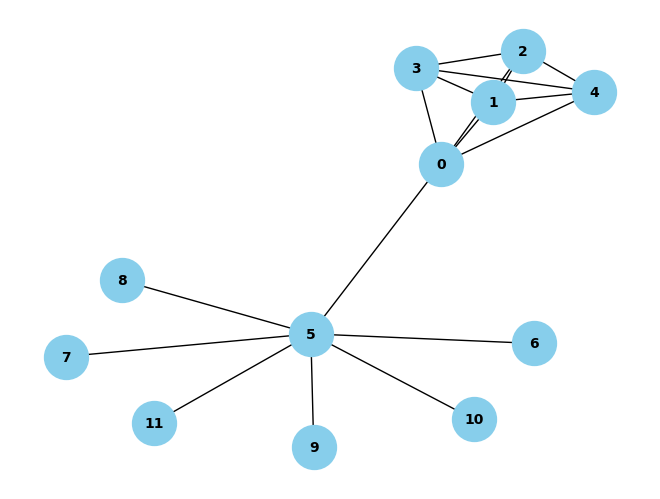

In [201]:
# Criar o grafo
A = np.array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 
              [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 
              [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

G = nx.from_numpy_array(A)

# Calcular centralidades
'''
A centralidade de cada nó seja seu número de vizinhos normalizado.
'''
deg_centrality = nx.degree_centrality(G)

'''
A centralidade de cada nó é a soma da centralidade de vizinhos dividido por uma constante,
porém essa abordagem pode ser reduzida a um problema de encontrar o maior autovalor para um vetor:
-> Ax = λx
Dessa forma definimos max_iter para o número de iterações máxima procurando o autovetor correspondente ao maior autovalor,
por conta do Teorema de Perron-Frobenius, a partir disso, a centralidade dos nós é definida pelos elementos desse autovetor.
'''
eig_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Exibir tabela
centrality_df = pd.DataFrame({
    "Grau": deg_centrality,
    "Autovalor": eig_centrality
}).sort_index().round(4)

display(centrality_df)

# Visualizar grafo
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, font_size=10, font_weight='bold')

In [202]:
# a) Centralidade por grau em ordem decrescente
display(centrality_df.Grau.sort_values(ascending=False))

# b) Centralidade por autovalor/autovetor em ordem decrescente
display(centrality_df.Autovalor.sort_values(ascending=False))

5    0.636400
0    0.454500
2    0.363600
1    0.363600
3    0.363600
4    0.363600
6    0.090900
7    0.090900
8    0.090900
9    0.090900
10   0.090900
11   0.090900
Name: Grau, dtype: float64

0    0.465300
1    0.430200
2    0.430200
3    0.430200
4    0.430200
5    0.178200
6    0.043700
7    0.043700
8    0.043700
9    0.043700
10   0.043700
11   0.043700
Name: Autovalor, dtype: float64

<Axes: >

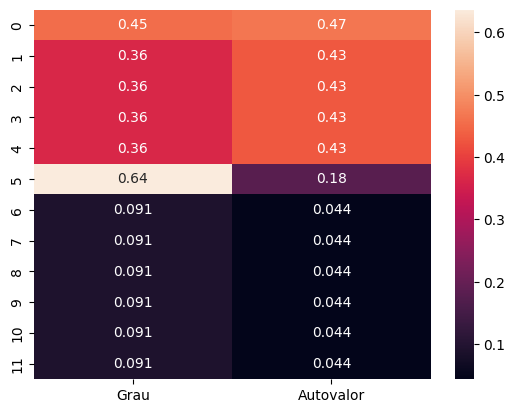

In [203]:
# Checa o heatmap para analisar as relações das centralidades
sns.heatmap(centrality_df, annot=True)

# c) Analisando a matriz, é possível perceber que o 5 tem uma centralidade de grau alta e uma centralidade de autovetor baixa,
# assim, apesar de ter várias ligações, 5 é ligado a vérticess pouco importantes. Sendo uma espécie de hub para nós periféricos.

# d) Isso não ocorre, pois um nó com baixo grau e alta centralidade de autovalor seria um nó com pouquíssimas conexões, mas que 
# estaria conectado diretamente aos nós mais importantes e influentes da rede. Já que as centralidades de autovetor estão em nós
# que são bem conectados entre si (0 até o 4)

# e) Observações que podem ser tiradas desse grafo:
# - Centralidade de Grau é uma medida local e quantitativa e Centralidade de Autovetor é uma medida global e qualitativa
# - Nós de 0 a 4 formam uma rede bem conectada entre si, enquanto 6 a 11 são nós periféricos. Esses dois polos são conectados pelo nó 5

# **Exercício 5**

Em um cenário onde um analista de dados possui uma coleção de documentos textuais de natureza variada — como notícias, publicações em redes sociais, ou descrições de produtos —, surge a necessidade de identificar automaticamente os **principais temas ou tópicos** abordados nesses textos. Tal tarefa é especialmente relevante em contextos onde os dados são não rotulados e o volume de documentos inviabiliza a análise manual.


**Objetivo:**
Dado um conjunto de 10 manchetes de notícias, aplicar **Análise Semântica Latente (LSA) via SVD** para identificar **temas comuns** (conceitos latentes) e analisar a relevância de palavras e documentos.

---

# **Conjunto de manchetes**

1. Time vence campeonato nacional
2. Jogador é destaque na vitória do time
3. Equipe perde final em jogo equilibrado
4. Treinador elogia desempenho da equipe
5. Jogador marca gol decisivo no campeonato
6. Time reage e vence partida importante
7. Jogador lidera equipe rumo à final
8. Equipe conquista vitória histórica
9. Treinador anuncia substituição estratégica
10. Jogador decide jogo com gol de empate
11. Bolsa de valores sobe após anúncio econômico
12. Mercado financeiro reage a nova política fiscal
13. Inflação preocupa investidores e governo
14. Governo anuncia medidas para controlar inflação
15. Mercado de ações fecha em alta
16. Valores da bolsa aumentam com relatório positivo
17. Investidores reagem à decisão do banco central
18. Política econômica impacta mercado financeiro
19. Inflação e desemprego influenciam investidores
20. Governo divulga plano fiscal detalhado



**Procedimento matemático**

 **Representação:**

   * Construir uma **matriz termo-documento** $A \in \mathbb{R}^{m \times 10}$, com linhas correspondendo a **palavras relevantes** (substantivos e verbos de ação) e colunas aos documentos.
   * Cada elemento $a_{ij}$ indica a presença ou frequência da palavra $i$ no documento $j$.

 **Decomposição SVD:**
   $
   A = U  \Sigma  V^T
   $

   * $U \in \mathbb{R}^{m \times r}$: indica a participação das palavras nos conceitos latentes
   * $\Sigma \in \mathbb{R}^{r \times r}$: indica a importância de cada conceito
   * $V \in \mathbb{R}^{r \times n}$: indica a participação dos documentos nos conceitos latentes
   * $r = \text{posto}(A)$


a) Qual é o tema dominante no conjunto de manchetes? Qual é secundário?

b) Quais palavras (substantivos ou verbos) são mais representativas de cada tema? Liste 5 de cada.

c) Quais são os 5 documentos mais representativas de cada tema?

d) Como os verbos de ação contribuiram para a distinção entre os temas?




In [204]:
# LSA com SVD em 20 manchetes, vocabulário único e verbos de ação
# Conjunto de 20 manchetes
documents = [
    # Esportes
    "Time vence campeonato nacional",
    "Jogador é destaque na vitória do time",
    "Equipe perde final em jogo equilibrado",
    "Treinador elogia desempenho da equipe",
    "Jogador marca gol decisivo no campeonato",
    "Time reage e vence partida importante",
    "Jogador lidera equipe rumo à final",
    "Equipe conquista vitória histórica",
    "Treinador anuncia substituição estratégica",
    "Jogador decide jogo com gol de empate",
    # Economia
    "Bolsa de valores sobe após anúncio econômico",
    "Mercado financeiro reage a nova política fiscal",
    "Inflação preocupa investidores e governo",
    "Governo anuncia medidas para controlar inflação",
    "Mercado de ações fecha em alta",
    "Valores da bolsa aumentam com relatório positivo",
    "Investidores reagem à decisão do banco central",
    "Política econômica impacta mercado financeiro",
    "Inflação e desemprego influenciam investidores",
    "Governo divulga plano fiscal detalhado"
]

# Vocabulário restrito a palavras-chave (substantivos + verbos de ação), sem duplicatas
vocabulary = [
    # Esportes
    "time", "jogador", "campeonato", "vitória", "equipe", "final", "jogo", "treinador", "gol",
    "vence", "marca", "perde", "reage", "decide", "conquista", "anuncia", "lidera", "substituição",
    # Economia
    "bolsa", "valores", "mercado", "financeiro", "inflação", "investidores", "governo",
    "sobe", "preocupa", "divulga", "impacta", "aumentam", "decisão", "plano"
]

# Matriz termo-documento (contagem simples)
class DocAnalysis:
    """
    Análise de documentos com vocabulário e mapeamento de temas.
    """
    documents:        list[str]
    vocabulary:       list[str]
    feature_names:    np.ndarray
    U:                np.ndarray
    V:                np.ndarray
    sigma:            np.ndarray

    def __init__(self, documents: list[str], vocabulary: list[str], k : int = 2):
        """
        Inicializa a análise.
        
        Args:
            documents: Lista de documentos
            vocabulary: Vocabulário pré-definido
            k : Número de componentes do SVD
        """

        # Usa Vectorize para mapear os documentos para os vocabulários
        self.documents = documents
        self.vocabulary = vocabulary
        vectorize = CountVectorizer(vocabulary=vocabulary)

        # Cria a matriz termo-documento A
        A = vectorize.fit_transform(documents).T

        # Pega as palavras mapeadas
        self.feature_names = vectorize.get_feature_names_out()

        # Aplicar SVD (LSA)
        svd = TruncatedSVD(n_components=k, random_state=42, algorithm='arpack')
        termo_documento_svd = svd.fit_transform(A)

        self.sigma = svd.singular_values_      # Importância de cada tema
        self.U = termo_documento_svd / self.sigma   # Relação palavras-temas
        self.V = svd.components_.T                  # Relação documentos-temas

    def display_identity_themes(self, vocabulary_theme_map : dict[tuple[int,int], str]) -> None:
        """
        Identifica e rotula os temas brutos com base em um mapa de vocabulário

        Para cada tema analisado pelo SVD, ele extrai a palavra de maior peso e verifica se ela
        pertence a uma parte específica do vocabulário principal, definido em vocabulary_theme_map

        Esse método não é recomendado em casos reais, porém no contexto do exercício 
        em ambiente controlado, podemos verificar somente a primeira palavra para definir o tema

        Args:
            vocabulary_theme_map: Dicionário que mapeia partes de índice do vocabulário a um
            nome de tema. Com a chave sendo uma tupla de índice inicial e final.
        """
        results_data = []
        map_keys = list(vocabulary_theme_map.keys())

        for i in range(self.U.shape[1]):
            main_word = self.feature_names[self.U[:, i].argmax()]
            
            singular_value = self.sigma[i]
            identified_theme = "Não Identificado" # Valor padrão

            if i < len(map_keys):
                start_index, end_index = map_keys[i]
                
                if main_word in self.vocabulary[start_index:end_index]:
                    identified_theme = vocabulary_theme_map[(start_index, end_index)]
            
            results_data.append({
                "Tema Bruto": i,
                "Importância (Valor Singular)": singular_value,
                "Palavra Principal": main_word,
                "Tema Identificado": identified_theme
            })

        display(pd.DataFrame(results_data))

    def display_n_top_words(self, n_top_words : int = 5) -> None:
        """
        Exibe as n_top_words palavras mais relevantes para cada tema

        Args:
            n_top_words: Número de palavras do topo a serem exibidas para cada tema. Valor padrão é 5.
        """
        for i in range(self.U.shape[1]):
            # Cria o array top_words sendo os n_top_words maiores pesos de palavras em relação ao tema
            top_words = [
                (self.feature_names[j], self.U[j, i]) for j in self.U[:, i].argsort()[::-1][:n_top_words]
            ]
            
            df = pd.DataFrame(top_words, columns=['Palavra', f'Peso (Tema {i})'])
            display(df)

    def display_n_top_documents(self, n_top_documents : int = 5) -> None:
        """
        Exibe os n_top_documents documentos mais relevantes para cada tema

        Args:
            n_top_documents: Número de documentos do topo a serem exibidos para cada tema. Valor padrão é 5.
        """
        for i in range(self.V.shape[1]):
            # Cria o array top_words sendo os n_top_words maiores pesos de palavras em relação ao tema
            top_documents = [
                (self.documents[j], self.V[j, i]) for j in self.V[:, i].argsort()[::-1][:n_top_documents]
            ]
            
            df = pd.DataFrame(top_documents, columns=['Documento', f'Peso (Tema {i})'])
            display(df)

    def display_specific_words(self, specific_words : list[str]) -> None:
        """
        Exibe as palavras específicas do vocabulário com o seu peso

        Args:
            specific_words: Lista de palavras a serem consultadas.
        """
        for i in range(self.U.shape[1]):
            filtered_theme_words = [
                (self.feature_names[j], self.U[j, i])                   
                for j in range(len(self.feature_names))                 
                if self.feature_names[j] in set(specific_words)
            ]
            display(pd.DataFrame(filtered_theme_words, columns=['Palavra', f'Peso (Tema {i})']))

    def display_heatmap(self) -> None:
        """
        Exibe um heatmap de palavras e documentos
        """
        plt.figure(figsize=(max(8, self.U.shape[0] / 2.5), max(10, self.U.shape[1] * 1.5)))

        df = pd.DataFrame(data=self.U, 
                          index=self.feature_names, 
                          columns=[f'Peso (Tema {i})' for i in range(self.U.shape[1])])
        
        sns.heatmap(df, fmt=".2f", annot=True)
    
doc = DocAnalysis(documents, vocabulary)

In [205]:
# a)
vocabulary_theme_map = {
    (0, 18): 'Esportes',
    (18, len(vocabulary)): 'Economia'
}
doc.display_identity_themes(vocabulary_theme_map)

,Tema Bruto,Importância (Valor Singular),Palavra Principal,Tema Identificado
0,0,2.949306,jogador,Esportes
1,1,2.702672,inflação,Economia


In [206]:
# b)
doc.display_n_top_words()

,Palavra,Peso (Tema 0)
0,jogador,0.562916
1,equipe,0.448951
2,final,0.305565
3,gol,0.280497
4,jogo,0.280417


,Palavra,Peso (Tema 1)
0,inflação,0.581702
1,governo,0.539143
2,investidores,0.471593
3,preocupa,0.252590
4,anuncia,0.229841


In [207]:
# c)
doc.display_n_top_documents()

,Documento,Peso (Tema 0)
0,Jogador lidera equipe rumo à final,0.504716
1,Jogador decide jogo com gol de empate,0.430546
2,Jogador marca gol decisivo no campeonato,0.396726
3,Equipe perde final em jogo equilibrado,0.396489
4,Jogador é destaque na vitória do time,0.328223


,Documento,Peso (Tema 1)
0,Inflação preocupa investidores e governo,0.682668
1,Governo anuncia medidas para controlar inflação,0.499760
2,Inflação e desemprego influenciam investidores,0.389724
3,Governo divulga plano fiscal detalhado,0.274700
4,Investidores reagem à decisão do banco central,0.202169


In [208]:
# d)
verbos = ["vence", "marca", "perde", "reage", "decide", "conquista", "anuncia", "lidera", 
          "sobe", "preocupa", "divulga", "impacta", "aumentam"]
doc.display_specific_words(verbos)

,Palavra,Peso (Tema 0)
0,vence,0.098901
1,marca,0.134515
2,perde,0.134435
3,reage,0.049961
4,decide,0.145982
5,conquista,0.083638
6,anuncia,0.014021
7,lidera,0.171131
8,sobe,-0.000000
9,preocupa,0.002053


,Palavra,Peso (Tema 1)
0,vence,-0.006429
1,marca,-0.005712
2,perde,0.000520
3,reage,-0.003774
4,decide,-0.004937
5,conquista,0.000833
6,anuncia,0.229841
7,lidera,-0.001327
8,sobe,-0.000000
9,preocupa,0.252590


In [209]:
# d) Continuação: Vamos criar um vocabulário sem os verbos e ver como fica a análise
vocabulary_without_verbs = [
    # Esportes
    "time", "jogador", "campeonato", "vitória", "equipe", "final", "jogo", "treinador", "gol", "substituição",
    # Economia
    "bolsa", "valores", "mercado", "financeiro", "inflação", "investidores", "governo", "decisão", "plano"
]

vocabulary_without_verbs_theme_map = {
    (0, 10): 'Esportes',
    (10, len(vocabulary)): 'Economia'
}

doc_without_verb = DocAnalysis(documents, vocabulary_without_verbs)

In [210]:
doc_without_verb.display_identity_themes(vocabulary_without_verbs_theme_map)
doc_without_verb.display_n_top_words()
doc_without_verb.display_n_top_documents()

,Tema Bruto,Importância (Valor Singular),Palavra Principal,Tema Identificado
0,0,2.795403,jogador,Esportes
1,1,2.545739,inflação,Economia


,Palavra,Peso (Tema 0)
0,jogador,0.600904
1,equipe,0.481654
2,final,0.319047
3,jogo,0.290814
4,gol,0.289270


,Palavra,Peso (Tema 1)
0,inflação,0.624403
1,investidores,0.543353
2,governo,0.543353
3,plano,0.099138
4,decisão,0.099138


,Documento,Peso (Tema 0)
0,Jogador lidera equipe rumo à final,0.501396
1,Jogador decide jogo com gol de empate,0.422475
2,Equipe perde final em jogo equilibrado,0.390468
3,Jogador marca gol decisivo no campeonato,0.386152
4,Jogador é destaque na vitória do time,0.369746


,Documento,Peso (Tema 1)
0,Inflação preocupa investidores e governo,0.672146
1,Inflação e desemprego influenciam investidores,0.458710
2,Governo anuncia medidas para controlar inflação,0.458710
3,Governo divulga plano fiscal detalhado,0.252379
4,Investidores reagem à decisão do banco central,0.252379


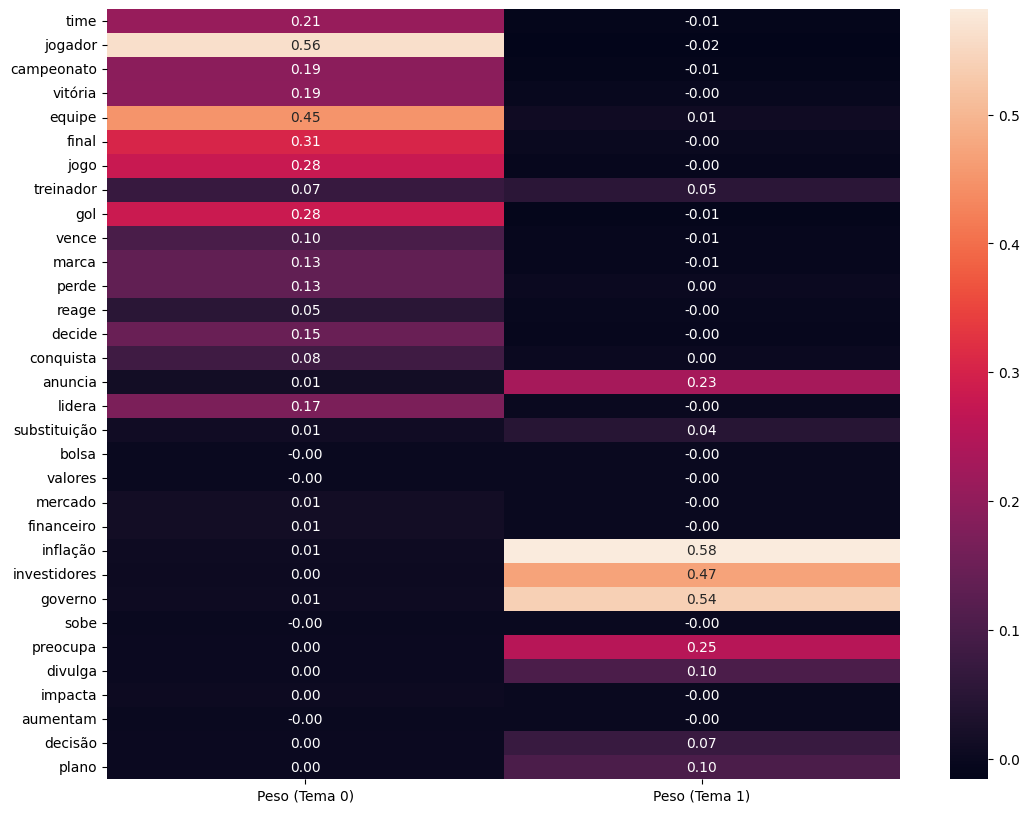

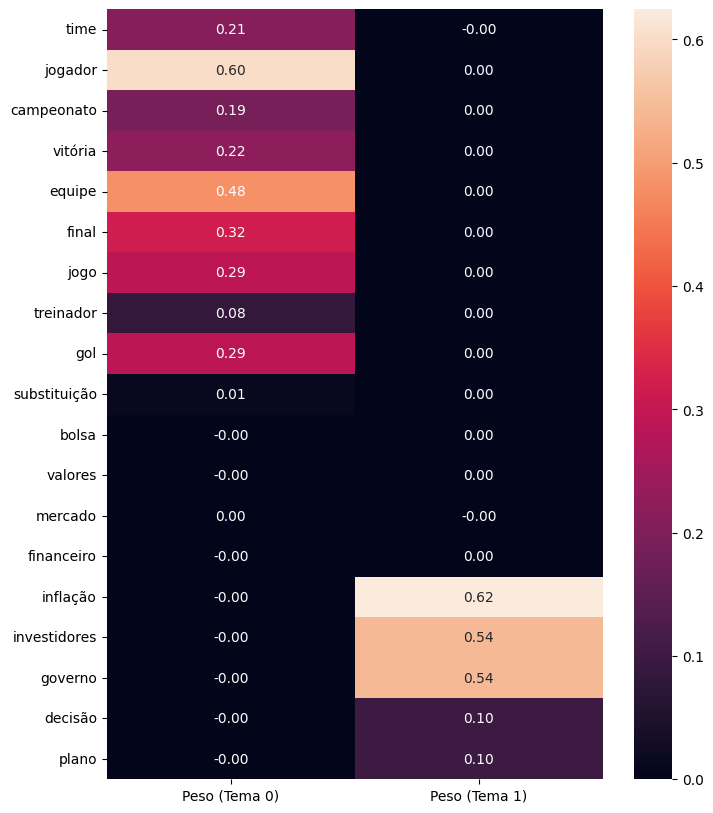

In [211]:
doc.display_heatmap()
doc_without_verb.display_heatmap()

# Podemos ver que apesar de não avaliar mais a semântica verbal, houve uma boa distinção 
# dos dois temas da mesma forma. Os valores singulares menores indicam que a estrutura 
# geral dos dados é menos complexa, porém ainda suficiente para a distinção temática.
# Houve um aumento da importância relativa dos substantivos na análise, tornando-os 
# mais decisivos para a classificação.